In [1]:
# !pip install odfpy
# !pip install seaborn
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
from yaml import Loader
import numpy as np
import analyze_cells_energy as ace
import utils
from scipy.stats import ttest_ind, mannwhitneyu
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
root_directory = '/home/stella/Documents/Torino/projects/'
experiment = 'SexualImprinting'
experimental_group = 'Black_wf_WholeBrain'
data_directory = root_directory + experiment + '/' \
                + experimental_group + '/'
subjects = [name for name in os.listdir(data_directory) \
            if os.path.isdir(os.path.join(data_directory, name))]

In [3]:
# load query file where we added volumes for each area
volumes = ace.clean_volumes_database()

In [4]:
def load_subject(subject, data_directory, threshold):
    file_suffix = 'cells_' + str(threshold)
    df_mouse = pd.read_csv(data_directory + subject + '/' + file_suffix + '.csv')
    df_mouse = ace.reformat_df_mouse(df=df_mouse)
    
    return df_mouse

# Analysis on Black with father Whole Brain

In [5]:
dict_results_across_mice = {subject: ace.calculate_cells_energy_per_level(df_mouse=load_subject(subject=subject, 
                                                                                               data_directory=data_directory,
                                                                                              threshold=2500), 
                                                                         vol=volumes, 
                                                                         level=8) for subject in subjects}
np.save('dict_results/dict_results_across_mice_Black_wf_WholeBrain_filtered.npy', dict_results_across_mice)

/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/stella/anaconda2/lib/pytho

In [7]:
dict_results_across_mice = np.load('dict_results/dict_results_across_mice_Black_wf_WholeBrain_filtered.npy', 
                                   allow_pickle=True).item()

In [8]:
subjects = list(dict_results_across_mice.keys())

# List areas with null cell count

In [9]:
db_null_count = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject].n_cells == 0] for subject in subjects}

# List areas with no volume

In [10]:
db_null_volume = {subject: dict_results_across_mice[subject][
    dict_results_across_mice[subject]['energy'].isnull()] for subject in subjects}

# Divide mice into experimental groups: FAM/UNFAM/CONTROL

In [11]:
experimental_groups = utils.divide_in_exp_groups(list_subjects=subjects)
experimental_groups

{'Control': ['BL53Control', 'BL45Control', 'BL51Control'],
 'Fam': ['BL49Fam', 'BL47Fam', 'BL50Fam'],
 'Unfam': ['BL48Unfam', 'BL54Unfam', 'BL52Unfam', 'BL46Unfam']}

# Calculate cell count across experimental groups

In [12]:
df_control_cell_count, df_fam_cell_count, df_unfam_cell_count = \
ace.calculate_value_across_groups(experimental_groups=experimental_groups, 
                              dict_results_across_mice=dict_results_across_mice, 
                              value='n_cells')

In [13]:
df_control_cell_count.set_index('area').sum()
#before - unfiltered
# BL53Control    101102
# BL45Control    164456
# BL51Control    183728
# dtype: int64

BL53Control     68884
BL45Control     97896
BL51Control    128287
dtype: int64

In [14]:
df_fam_cell_count.set_index('area').sum()
#before - unfiltered
# BL49Fam    132892
# BL47Fam    177987
# BL50Fam    161343
# dtype: int64

BL49Fam     96671
BL47Fam    122181
BL50Fam    110637
dtype: int64

In [15]:
df_unfam_cell_count.set_index('area').sum()
#before - unfiltered
# BL48Unfam    151801
# BL54Unfam    116642
# BL52Unfam     78038
# BL46Unfam     78504
# dtype: int64

BL48Unfam    111611
BL54Unfam     81813
BL52Unfam     58691
BL46Unfam     61901
dtype: int64

# Look at cell count per area

In [16]:
df_control_cell_count.set_index('area').loc['Medial amygdalar nucleus']

BL53Control    309
BL45Control    513
BL51Control    735
Name: Medial amygdalar nucleus, dtype: int64

In [17]:
df_fam_cell_count.set_index('area').loc['Medial amygdalar nucleus']

BL49Fam    1866
BL47Fam    1792
BL50Fam    1513
Name: Medial amygdalar nucleus, dtype: int64

In [18]:
df_unfam_cell_count.set_index('area').loc['Medial amygdalar nucleus']

BL48Unfam    1000
BL54Unfam    1068
BL52Unfam     487
BL46Unfam     753
Name: Medial amygdalar nucleus, dtype: int64

In [19]:
df_control_cell_count.set_index('area').loc['Ventral premammillary nucleus']

BL53Control    13
BL45Control    13
BL51Control     7
Name: Ventral premammillary nucleus, dtype: int64

In [20]:
df_fam_cell_count.set_index('area').loc['Ventral premammillary nucleus']

BL49Fam    364
BL47Fam    322
BL50Fam    267
Name: Ventral premammillary nucleus, dtype: int64

In [21]:
df_unfam_cell_count.set_index('area').loc['Ventral premammillary nucleus']

BL48Unfam    160
BL54Unfam    167
BL52Unfam    124
BL46Unfam     86
Name: Ventral premammillary nucleus, dtype: int64

In [22]:
df_control_cell_count.set_index('area').loc['Main olfactory bulb']

BL53Control    1817
BL45Control    2466
BL51Control    4832
Name: Main olfactory bulb, dtype: int64

In [23]:
df_fam_cell_count.set_index('area').loc['Main olfactory bulb']

BL49Fam    7091
BL47Fam    7220
BL50Fam    2663
Name: Main olfactory bulb, dtype: int64

In [24]:
df_unfam_cell_count.set_index('area').loc['Main olfactory bulb']

BL48Unfam    2176
BL54Unfam    4253
BL52Unfam    5264
BL46Unfam    7237
Name: Main olfactory bulb, dtype: int64

In [25]:
df_control_cell_count.set_index('area').loc['Accessory olfactory bulb']

BL53Control     48
BL45Control     80
BL51Control    321
Name: Accessory olfactory bulb, dtype: int64

In [26]:
df_fam_cell_count.set_index('area').loc['Accessory olfactory bulb']

BL49Fam    336
BL47Fam    192
BL50Fam    205
Name: Accessory olfactory bulb, dtype: int64

In [27]:
df_unfam_cell_count.set_index('area').loc['Accessory olfactory bulb']

BL48Unfam     75
BL54Unfam    182
BL52Unfam    127
BL46Unfam    743
Name: Accessory olfactory bulb, dtype: int64

## Calculate t-tests across groups per area

In [28]:
df_ttest_ncells = ace.test_across_groups([df_control_cell_count,df_fam_cell_count,df_unfam_cell_count])

In [29]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_ncells = df_ttest_ncells.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [30]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:15].set_index('area')

,pval_Control_vs_Fam
area,
Cortical amygdalar area,0.000236573
Ventral premammillary nucleus,0.000403429
Posterior amygdalar nucleus,0.00154682
Medial amygdalar nucleus,0.00180187
Piriform-amygdalar area,0.0121664
Arcuate hypothalamic nucleus,0.0164421
Tuberomammillary nucleus,0.0181436
Endopiriform nucleus,0.0196225
Basomedial amygdalar nucleus,0.0199292


In [31]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']].set_index('area').loc['Supramammillary nucleus']

pval_Control_vs_Fam    0.227917
Name: Supramammillary nucleus, dtype: object

In [32]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:15].set_index('area')

,pval_Control_vs_Unfam
area,
Ventral premammillary nucleus,0.00256283
Parafascicular nucleus,0.0168701
Posterior amygdalar nucleus,0.0201593
Anterior hypothalamic nucleus,0.0365522
Ventral tegmental area,0.0377118
Lateral posterior nucleus of the thalamus,0.0408237
Lateral habenula,0.0468521
Pretectal region,0.0519666
Cortical amygdalar area,0.0520029


In [33]:
# sort dataframe pvalues of control vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']].set_index('area').loc['Supramammillary nucleus']

pval_Control_vs_Unfam    0.620896
Name: Supramammillary nucleus, dtype: object

In [34]:
# sort dataframe pvalues of fam vs unfam and pick the first 20
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:40].set_index('area')

,pval_Fam_vs_Unfam
area,
Ventral premammillary nucleus,0.00233475
Posterolateral visual area,0.00391619
Medial amygdalar nucleus,0.00419229
Anteroventral nucleus of thalamus,0.00545371
Paraventricular nucleus of the thalamus,0.00613425
Superior colliculus motor related,0.0118695
Anterodorsal nucleus,0.0122508
Arcuate hypothalamic nucleus,0.0146144
Midbrain reticular nucleus,0.01548


In [35]:
df_ttest_not_null_ncells.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']].set_index('area').loc['Supramammillary nucleus']

pval_Fam_vs_Unfam    0.0619302
Name: Supramammillary nucleus, dtype: object

## Calculate cross corr across groups per area on cell count

In [36]:
corr_matrix_control_ncells = ace.cross_corr(df_control_cell_count)

In [37]:
corr_matrix_fam_ncells = ace.cross_corr(df_fam_cell_count)

In [38]:
corr_matrix_unfam_ncells = ace.cross_corr(df_unfam_cell_count)

## Plot cross corr matrix across groups per area on cell count

Text(0.5, 1.0, 'CONTROL')

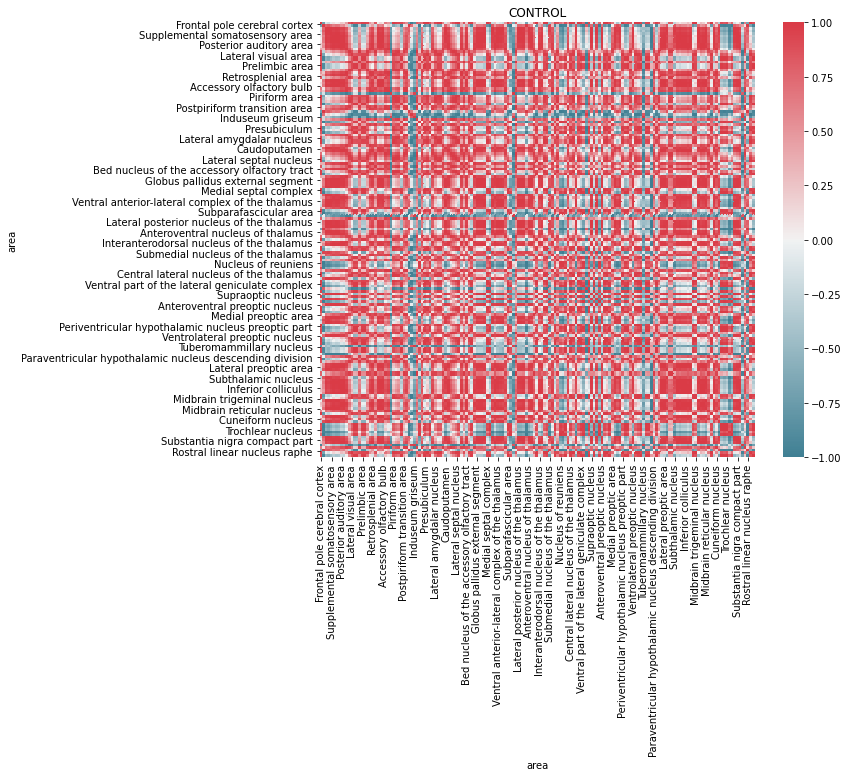

In [39]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

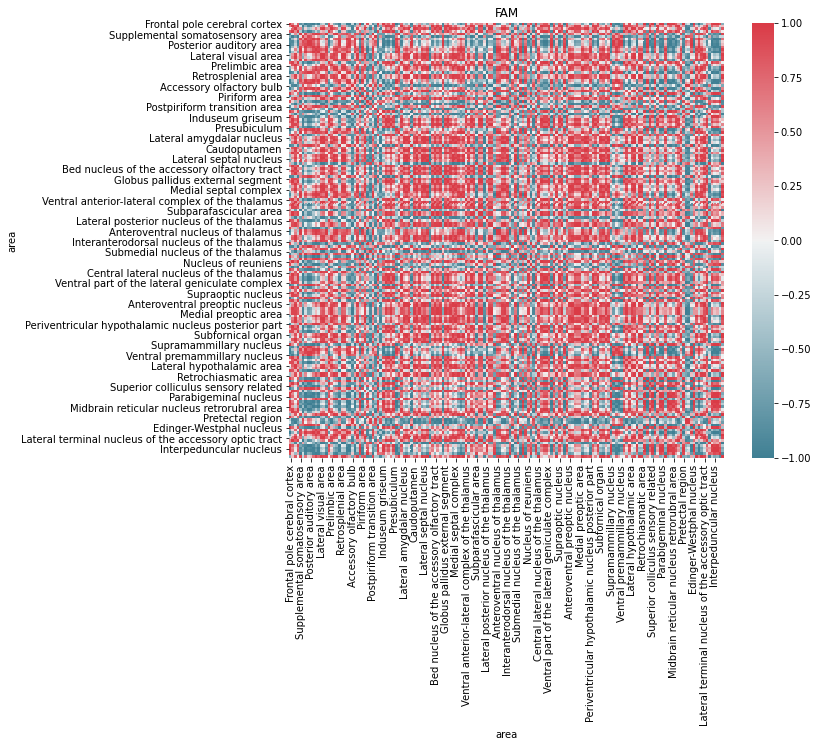

In [40]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

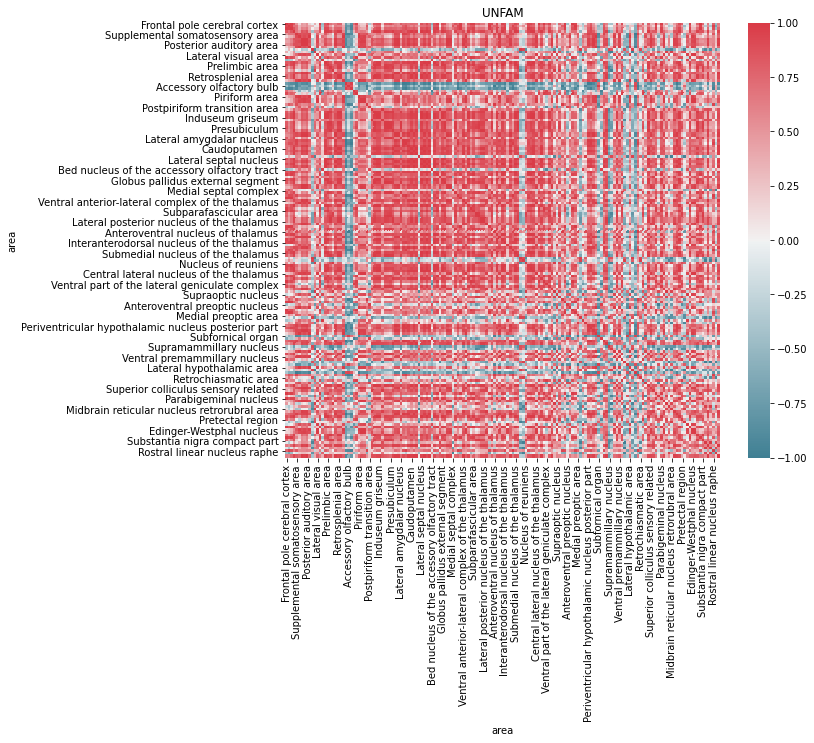

In [41]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_ncells,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# Calculate energy across experimental groups

In [42]:
df_control_energy, df_fam_energy, df_unfam_energy = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='energy')

## T-test on energy across groups

In [43]:
df_ttest_energy = ace.test_across_groups([df_control_energy,df_fam_energy,df_unfam_energy])

In [44]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_energy = df_ttest_energy.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [45]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:10].set_index('area')

,pval_Control_vs_Fam
area,
Ventral premammillary nucleus,0.000343763
Cortical amygdalar area,0.00035611
Posterior amygdalar nucleus,0.00134549
Medial amygdalar nucleus,0.00155866
Tuberomammillary nucleus,0.00933977
Piriform-amygdalar area,0.0117622
Arcuate hypothalamic nucleus,0.014368
Rhomboid nucleus,0.0190927
Parafascicular nucleus,0.0213086


In [46]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:15].set_index('area')

,pval_Control_vs_Unfam
area,
Ventral premammillary nucleus,0.00299586
Parafascicular nucleus,0.0127831
Posterior amygdalar nucleus,0.0193205
Ventral tegmental area,0.0231132
Lateral habenula,0.0345352
Lateral posterior nucleus of the thalamus,0.034967
Anterior hypothalamic nucleus,0.0386529
Pretectal region,0.0448542
Cortical amygdalar area,0.0457707


In [47]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_energy.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Ventral premammillary nucleus,0.0015005
Medial amygdalar nucleus,0.00253326
Posterolateral visual area,0.00527164
Paraventricular nucleus of the thalamus,0.00677759
Anteroventral nucleus of thalamus,0.00709272
Trochlear nucleus,0.0073498
Superior colliculus motor related,0.0105176
Arcuate hypothalamic nucleus,0.0106776
Posterior limiting nucleus of the thalamus,0.013541


In [48]:
corr_matrix_control_energy = ace.cross_corr(df_control_energy)

In [49]:
corr_matrix_fam_energy = ace.cross_corr(df_fam_energy)

In [50]:
corr_matrix_unfam_energy = ace.cross_corr(df_unfam_energy)

## Plot cross corr matrix across groups per area on energy

Text(0.5, 1.0, 'CONTROL')

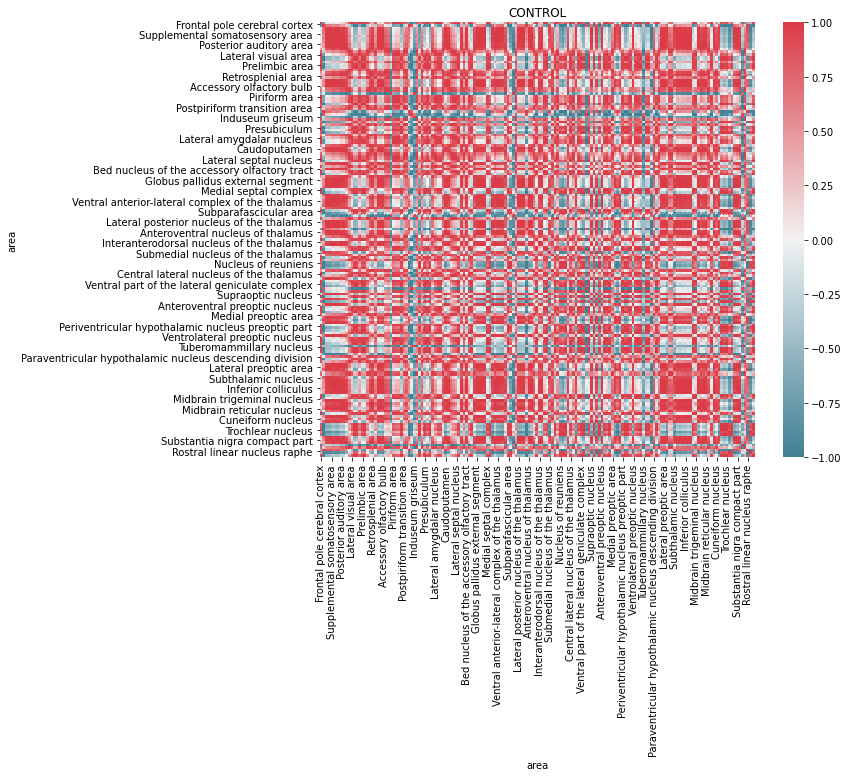

In [51]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_control_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('CONTROL')

Text(0.5, 1.0, 'FAM')

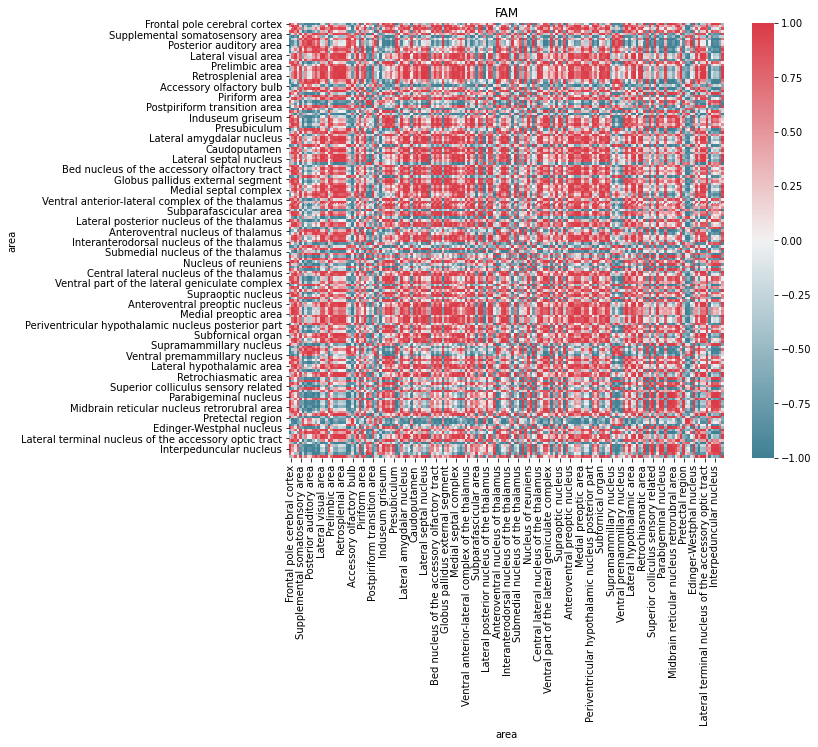

In [52]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_fam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('FAM')

Text(0.5, 1.0, 'UNFAM')

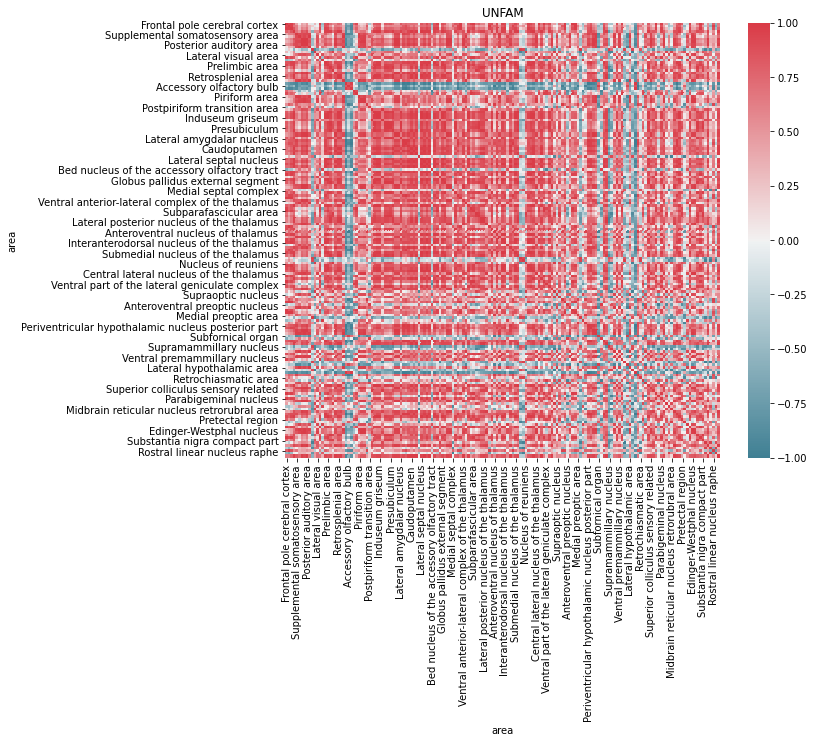

In [53]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix_unfam_energy,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('UNFAM')

# Calculate relative density

In [54]:
df_control_rd, df_fam_rd, df_unfam_rd = \
ace.calculate_value_across_groups(experimental_groups, dict_results_across_mice, value='relative_density')

In [55]:
df_ttest_rd = ace.test_across_groups([df_control_rd,df_fam_rd,df_unfam_rd])

In [56]:
# remove rows corresponding to area that have zero cell count across all experimental groups
df_ttest_not_null_rd = df_ttest_rd.dropna(axis=0,
                                   how='all',
                                   subset=['pval_Control_vs_Fam',
                                          'pval_Control_vs_Unfam',
                                          'pval_Fam_vs_Unfam'])

In [57]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Control_vs_Fam')[['area', 'pval_Control_vs_Fam']][0:20].set_index('area')

,pval_Control_vs_Fam
area,
Ventral premammillary nucleus,0.0025959
Medial amygdalar nucleus,0.00375124
Posterior amygdalar nucleus,0.00453776
Cortical amygdalar area,0.00938414
Parafascicular nucleus,0.00994964
Medial preoptic area,0.0113506
Basomedial amygdalar nucleus,0.0165182
Central amygdalar nucleus,0.01659
Arcuate hypothalamic nucleus,0.0172529


In [58]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Control_vs_Unfam')[['area', 'pval_Control_vs_Unfam']][0:20].set_index('area')

,pval_Control_vs_Unfam
area,
Posterior amygdalar nucleus,5.55198e-05
Ventral premammillary nucleus,0.000903763
Lateral posterior nucleus of the thalamus,0.00735601
Parafascicular nucleus,0.00749098
Central amygdalar nucleus,0.00830295
Cortical amygdalar area,0.00909734
Periventricular hypothalamic nucleus posterior part,0.0108977
Nucleus accumbens,0.0117455
Medial amygdalar nucleus,0.0119478


In [59]:
# sort dataframe pvalues of control vs fam and pick the first 20
df_ttest_not_null_rd.sort_values(by='pval_Fam_vs_Unfam')[['area', 'pval_Fam_vs_Unfam']][0:20].set_index('area')

,pval_Fam_vs_Unfam
area,
Anterodorsal nucleus,0.00978996
Posterior limiting nucleus of the thalamus,0.0160673
Trochlear nucleus,0.0168612
Mediodorsal nucleus of thalamus,0.0255619
Periaqueductal gray,0.0306596
Rostrolateral visual area,0.0337379
Ventral premammillary nucleus,0.0355823
Ventral posterior complex of the thalamus,0.0391633
Nucleus of the lateral olfactory tract,0.0395549
